police killings analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# import main data file
police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")

data analysis, first we look at the number of killings for each race and compare the results in a bar graph

[[<matplotlib.text.Text at 0x7fbe12f5f550>,

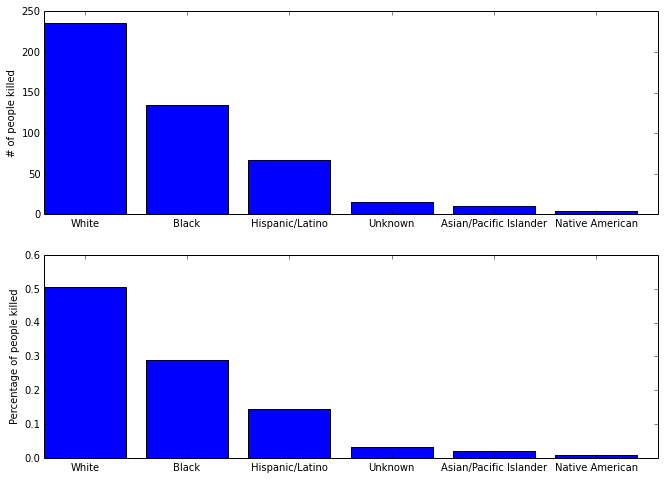

In [2]:
# calculate the number of killings for each race and compare the results in
# a bar chart
race_counts = police_killings["raceethnicity"].value_counts()
people_killed_count = police_killings["raceethnicity"].value_counts().sum()
race_counts_percentage = race_counts / people_killed_count
x_labels = race_counts.index.tolist()

fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,8))
ax1.bar(range(len(race_counts)), race_counts)
ax1.set(xticks=np.arange(len(race_counts)) + 0.4, 
        xticklabels=x_labels,
        ylabel="# of people killed")
ax2.bar(range(len(race_counts_percentage)), race_counts_percentage)
ax2.set(xticks=np.arange(len(race_counts)) + 0.4, 
        xticklabels=x_labels,
        ylabel="Percentage of people killed")

clean up the median personal icome column (get ride of empty values), visualize the incomes in a histomgram

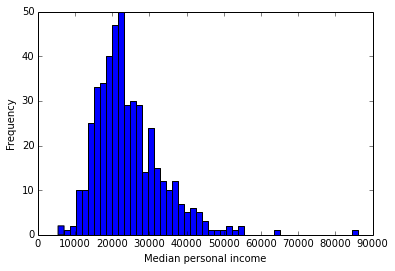

In [3]:
# create histogram of the median personal income column, requires some data cleaning first
income = police_killings["p_income"][police_killings["p_income"] != "-"]
income = income.astype(int) # convert from str to int

fig2, ax = plt.subplots(1, 1)
plt.hist(income, bins=50)
ax.set(xlabel="Median personal income", ylabel="Frequency")

compare the number of shootings on a state level (killings per million population), import second datafile containging the population of each state in 2015, police_killings.csv only contains the state abbreviation which is not included in state_populations_2015.csv, thus merge the two frames using the census code column, 

In [4]:
# import state populations data
state_pop = pd.read_csv("state_populations_2015.csv")

# calculate sum of shootings for each state identified by the census code
counts = police_killings["state_fp"].value_counts()

# create new dataframe containing census codes in an own column
states = pd.DataFrame({"STATE": counts.index,
                       "shootings": counts})

# merge the states dataframe containg the shooting numbers with the population dataframe 
# based on the census code column
states = states.merge(state_pop, on="STATE")

# add a column containing the population size in millions
states["pop_millions"] = states["POPESTIMATE2015"] / 1e6 

# add a column containing the number of police shootings per million of state population
states["shootings_per_million"] = states["shootings"] / states["pop_millions"]

# sort the dataframe based on the shootings rate in descending order
states = states.sort(columns="shootings_per_million", ascending=False)

# print out the top five states with the most and the least shootings per million inhabitants
print(states.head(5)[["NAME", "shootings_per_million"]])
print()
print(states.tail(5)[["NAME", "shootings_per_million"]]) 

        NAME  shootings_per_million
4   Oklahoma               5.624674
3    Arizona               3.661359
27  Nebraska               3.164240
34    Hawaii               2.794071
39    Alaska               2.708442

[5 rows x 2 columns]

             NAME  shootings_per_million
29  Massachusetts               0.735898
6        New York               0.656705
38           Iowa               0.640226
22   Pennsylvania               0.546768
43    Connecticut               0.278483

[5 rows x 2 columns]


clean up further rows for analysis, split dataframe into 10 states with the lowest shooting rates and 10 states with the highest shooting rates, calculate the means of certain columns for both dataframes to find any interesting patterns

In [5]:
# get rid of rows containing empty values in the race columns
pk = police_killings[(police_killings["share_white"] != "-") &
                     (police_killings["share_black"] != "-") &
                     (police_killings["share_hispanic"] != "-")]
pk[["share_white", "share_black", "share_hispanic"]] = pk[
    ["share_white", "share_black", "share_hispanic"]].astype(float)

# split data by shootings per million rating
lowest_10_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_10_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

low_pk = pk[pk["state"].isin(lowest_10_states)]
high_pk = pk[pk["state"].isin(highest_10_states)]

# calculate the mean values for certain columns for both datasets
cols = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

mean_low_pk_values = low_pk[cols].mean()
mean_high_pk_values = high_pk[cols].mean()

# print out the results
print(mean_low_pk_values)
print()
print(mean_high_pk_values)

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64


/usr/lib/python3/dist-packages/pandas/core/frame.py:1908: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  self[k1] = value[k2]


create a chloropleth map to map out the state level killing rates

http://ramiro.org/notebook/basemap-choropleth/

to do....
